<a href="https://colab.research.google.com/github/Vanbk/Tensorflow/blob/master/Neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import print_function

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

import tensorflow as tf
tf.reset_default_graph()

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

In [0]:
#  Training parameter
learning_rate = 0.001
num_steps = 15000
batch_size = 128
display_step = 100

# Network Parameter
n_hidden_1 = 256
n_hidden_2 = 256
num_input = 784
num_class = 10

# tf Graph
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, num_class])

In [0]:
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, num_class]))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([num_class]))
}

In [0]:
  def neural_net(x):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    out     = tf.add(tf.matmul(layer_2, weights['out']), biases['out'])
    return out

In [0]:
# construct model
logits = neural_net(X)
y_pre = tf.nn.softmax(logits)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels= Y))
# define optimizer
optimizer = tf.train.AdamOptimizer(learning_rate= learning_rate).minimize(loss)

# define metric

correct_predictions = tf.equal(tf.arg_max(y_pre, 1), tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

init = tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
  # Run initializer
  sess.run(init)
  train_loss_his = []
  train_acc_his = []
  record_step = []
  for step in range(1, num_steps + 1):
    # get training batch
    batch_x , batch_y = mnist.train.next_batch(batch_size)
    sess.run(optimizer, feed_dict = {X: batch_x, Y: batch_y})

    if step % display_step == 0 or step == 1:
      train_loss, train_acc = sess.run([loss, accuracy], feed_dict= {X: batch_x, Y: batch_y})
      train_loss_his.append(train_loss)
      train_acc_his.append(train_acc)
      record_step.append(step)
      print("step: {}  train_loss: {}  train_acc: {}".format(step, train_loss, train_acc))

  print ("finish training")

step: 1  train_loss: 2079.91357421875  train_acc: 0.09375
step: 100  train_loss: 222.30003356933594  train_acc: 0.65625
step: 200  train_loss: 117.8718490600586  train_acc: 0.765625
step: 300  train_loss: 95.62931823730469  train_acc: 0.8203125
step: 400  train_loss: 55.5721549987793  train_acc: 0.8671875
step: 500  train_loss: 30.736967086791992  train_acc: 0.8984375
step: 600  train_loss: 44.7648811340332  train_acc: 0.8671875
step: 700  train_loss: 37.616546630859375  train_acc: 0.8125
step: 800  train_loss: 41.096920013427734  train_acc: 0.8828125
step: 900  train_loss: 23.2166805267334  train_acc: 0.921875
step: 1000  train_loss: 26.235754013061523  train_acc: 0.890625
step: 1100  train_loss: 34.82387924194336  train_acc: 0.8671875
step: 1200  train_loss: 39.327171325683594  train_acc: 0.8828125
step: 1300  train_loss: 17.370058059692383  train_acc: 0.9140625
step: 1400  train_loss: 26.645374298095703  train_acc: 0.890625
step: 1500  train_loss: 6.218410968780518  train_acc: 0.960

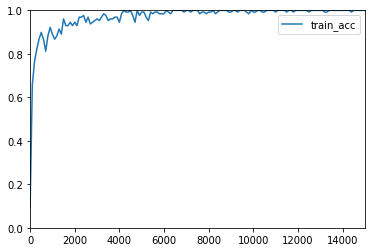

In [0]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(record_step, train_acc_his, label = "train_acc")
plt.axis([0, np.max(record_step), 0, np.max(train_acc_his)])
plt.legend()
plt.show()

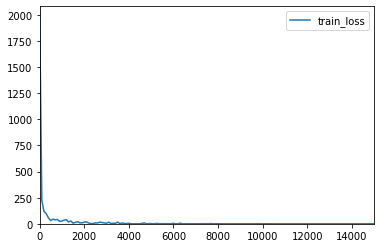

In [0]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(record_step, train_loss_his, label = "train_loss")
plt.axis([0, np.max(record_step), 0, np.max(train_loss_his)])
plt.legend()
plt.show()